In [830]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

pd.set_option('display.max_columns', None)

In [831]:
def prestazioni(albero, teste_x, teste_y):
    from sklearn.metrics import precision_score
    predictions = albero.predict(teste_x)
    accuracy = accuracy_score(teste_y, predictions)
    precision_score_value = precision_score(teste_y, predictions)
    recall_score_value = recall_score(teste_y,predictions)
    
    print("Accuracy:", (accuracy * 100).round(), "%")
    print('\nConfusion Matrix:')
    print(confusion_matrix(teste_y,predictions))
    print("\nRecall Score:", (recall_score_value * 100).round(), "%")
    print('\nPrecision Score Value', (precision_score_value * 100).round(), "%")

In [832]:
df = pd.read_csv('SINASC_RO_2019.csv').drop(columns='Unnamed: 0')
df.head(5)

,IDADEMAE,ESTCIVMAE,ESCMAE,QTDFILVIVO,QTDFILMORT,QTDFILTOTAL,GESTACAO,GRAVIDEZ,PARTO,CONSULTAS,DTNASC,HORANASC,SEXO,APGAR1,APGAR5,RACACOR,PESO,IDANOMAL,DTCADASTRO,NATURALMAE,DTNASCMAE,RACACORMAE,QTDGESTANT,QTDPARTNOR,QTDPARTCES,IDADEPAI,CONSPRENAT,MESPRENAT,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea,DTNASC_DIA,DTNASC_MES,DTCADASTRO_DIA,DTCADASTRO_MES,DTNASCMAE_DIA,DTNASCMAE_MES
0,19,5.0,8 a 11 anos,0,0,1,37 a 41 semanas,Única,Cesáreo,4,2019-02-19,1620.0,Masculino,9,10,Branca,3685.0,2,2019-03-08,811,2019-03-08,1,0,0,0,26,8,1.0,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Terça-feira,Fevereiro,Sexta-feira,Março,Sexta-feira,Março
1,29,2.0,8 a 11 anos,1,0,2,37 a 41 semanas,Única,Cesáreo,4,2019-02-21,1830.0,Feminino,8,9,Branca,3055.0,2,2019-03-08,811,2019-03-08,1,1,0,1,24,10,2.0,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Quinta-feira,Fevereiro,Sexta-feira,Março,Sexta-feira,Março
2,37,9.0,8 a 11 anos,2,0,3,37 a 41 semanas,Única,Cesáreo,4,2019-02-25,915.0,Feminino,8,10,Branca,3460.0,2,2019-03-08,841,2019-03-08,1,2,1,1,32,8,1.0,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Segunda-feira,Fevereiro,Sexta-feira,Março,Sexta-feira,Março
3,30,5.0,12 anos ou mais,0,0,1,37 a 41 semanas,Única,Cesáreo,3,2019-03-20,835.0,Feminino,9,10,Parda,2982.0,2,2019-04-03,841,2019-04-03,4,0,0,0,24,6,2.0,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273,Quarta-feira,Março,Quarta-feira,Abril,Quarta-feira,Abril
4,30,2.0,8 a 11 anos,1,0,2,37 a 41 semanas,Única,Cesáreo,4,2019-03-23,750.0,Feminino,8,10,Parda,3310.0,2,2019-04-03,811,2019-04-03,4,1,0,1,27,8,2.0,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Sábado,Março,Quarta-feira,Abril,Quarta-feira,Abril


In [833]:
PAIS = df[df['IDADEPAI'] != 0]
PAIS = PAIS.drop_duplicates()

In [834]:
def default(row):
    if (row['IDADEMAE'] <= 18) & (row['IDADEPAI'] > 18):
        return 1
    else:
        return 0

In [835]:
PAIS['default'] = PAIS.apply(default, axis=1)

In [836]:
display(PAIS.head(5))
print(PAIS.shape)

,IDADEMAE,ESTCIVMAE,ESCMAE,QTDFILVIVO,QTDFILMORT,QTDFILTOTAL,GESTACAO,GRAVIDEZ,PARTO,CONSULTAS,DTNASC,HORANASC,SEXO,APGAR1,APGAR5,RACACOR,PESO,IDANOMAL,DTCADASTRO,NATURALMAE,DTNASCMAE,RACACORMAE,QTDGESTANT,QTDPARTNOR,QTDPARTCES,IDADEPAI,CONSPRENAT,MESPRENAT,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea,DTNASC_DIA,DTNASC_MES,DTCADASTRO_DIA,DTCADASTRO_MES,DTNASCMAE_DIA,DTNASCMAE_MES,default
0,19,5.0,8 a 11 anos,0,0,1,37 a 41 semanas,Única,Cesáreo,4,2019-02-19,1620.0,Masculino,9,10,Branca,3685.0,2,2019-03-08,811,2019-03-08,1,0,0,0,26,8,1.0,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Terça-feira,Fevereiro,Sexta-feira,Março,Sexta-feira,Março,0
1,29,2.0,8 a 11 anos,1,0,2,37 a 41 semanas,Única,Cesáreo,4,2019-02-21,1830.0,Feminino,8,9,Branca,3055.0,2,2019-03-08,811,2019-03-08,1,1,0,1,24,10,2.0,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Quinta-feira,Fevereiro,Sexta-feira,Março,Sexta-feira,Março,0
2,37,9.0,8 a 11 anos,2,0,3,37 a 41 semanas,Única,Cesáreo,4,2019-02-25,915.0,Feminino,8,10,Branca,3460.0,2,2019-03-08,841,2019-03-08,1,2,1,1,32,8,1.0,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Segunda-feira,Fevereiro,Sexta-feira,Março,Sexta-feira,Março,0
3,30,5.0,12 anos ou mais,0,0,1,37 a 41 semanas,Única,Cesáreo,3,2019-03-20,835.0,Feminino,9,10,Parda,2982.0,2,2019-04-03,841,2019-04-03,4,0,0,0,24,6,2.0,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273,Quarta-feira,Março,Quarta-feira,Abril,Quarta-feira,Abril,0
4,30,2.0,8 a 11 anos,1,0,2,37 a 41 semanas,Única,Cesáreo,4,2019-03-23,750.0,Feminino,8,10,Parda,3310.0,2,2019-04-03,811,2019-04-03,4,1,0,1,27,8,2.0,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Sábado,Março,Quarta-feira,Abril,Quarta-feira,Abril,0


(7089, 41)


In [837]:
PAIS.columns

Index(['IDADEMAE', 'ESTCIVMAE', 'ESCMAE', 'QTDFILVIVO', 'QTDFILMORT',
       'QTDFILTOTAL', 'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC',
       'HORANASC', 'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL',
       'DTCADASTRO', 'NATURALMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT',
       'QTDPARTNOR', 'QTDPARTCES', 'IDADEPAI', 'CONSPRENAT', 'MESPRENAT',
       'munResNome', 'munResUf', 'munResLat', 'munResLon', 'munResAlt',
       'munResArea', 'DTNASC_DIA', 'DTNASC_MES', 'DTCADASTRO_DIA',
       'DTCADASTRO_MES', 'DTNASCMAE_DIA', 'DTNASCMAE_MES', 'default'],
      dtype='object')

## Colonne

In [838]:
PAIS = PAIS.drop(columns=['IDADEPAI', 'DTNASCMAE', 'DTNASC_DIA', 'DTNASC_MES', 'DTCADASTRO_DIA', 
                        'DTCADASTRO_MES', 'DTNASCMAE_DIA', 'DTNASCMAE_MES', 'DTNASC', 'HORANASC', 'DTCADASTRO'])

In [839]:
round((PAIS['default'].value_counts(normalize=True) * 100), 2)

default
0    92.35
1     7.65
Name: proportion, dtype: float64

In [840]:
PAIS.columns

Index(['IDADEMAE', 'ESTCIVMAE', 'ESCMAE', 'QTDFILVIVO', 'QTDFILMORT',
       'QTDFILTOTAL', 'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'SEXO',
       'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'NATURALMAE',
       'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR', 'QTDPARTCES', 'CONSPRENAT',
       'MESPRENAT', 'munResNome', 'munResUf', 'munResLat', 'munResLon',
       'munResAlt', 'munResArea', 'default'],
      dtype='object')

In [841]:
PAIS.head()

,IDADEMAE,ESTCIVMAE,ESCMAE,QTDFILVIVO,QTDFILMORT,QTDFILTOTAL,GESTACAO,GRAVIDEZ,PARTO,CONSULTAS,SEXO,APGAR1,APGAR5,RACACOR,PESO,IDANOMAL,NATURALMAE,RACACORMAE,QTDGESTANT,QTDPARTNOR,QTDPARTCES,CONSPRENAT,MESPRENAT,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea,default
0,19,5.0,8 a 11 anos,0,0,1,37 a 41 semanas,Única,Cesáreo,4,Masculino,9,10,Branca,3685.0,2,811,1,0,0,0,8,1.0,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,0
1,29,2.0,8 a 11 anos,1,0,2,37 a 41 semanas,Única,Cesáreo,4,Feminino,8,9,Branca,3055.0,2,811,1,1,0,1,10,2.0,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,0
2,37,9.0,8 a 11 anos,2,0,3,37 a 41 semanas,Única,Cesáreo,4,Feminino,8,10,Branca,3460.0,2,841,1,2,1,1,8,1.0,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,0
3,30,5.0,12 anos ou mais,0,0,1,37 a 41 semanas,Única,Cesáreo,3,Feminino,9,10,Parda,2982.0,2,841,4,0,0,0,6,2.0,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273,0
4,30,2.0,8 a 11 anos,1,0,2,37 a 41 semanas,Única,Cesáreo,4,Feminino,8,10,Parda,3310.0,2,811,4,1,0,1,8,2.0,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,0


In [842]:
PAIS[PAIS['default'] == 1].head()

,IDADEMAE,ESTCIVMAE,ESCMAE,QTDFILVIVO,QTDFILMORT,QTDFILTOTAL,GESTACAO,GRAVIDEZ,PARTO,CONSULTAS,SEXO,APGAR1,APGAR5,RACACOR,PESO,IDANOMAL,NATURALMAE,RACACORMAE,QTDGESTANT,QTDPARTNOR,QTDPARTCES,CONSPRENAT,MESPRENAT,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea,default
11,18,5.0,1 a 3 anos,0,0,1,37 a 41 semanas,Única,Vaginal,3,Feminino,8,9,Parda,2995.0,2,811,4,0,0,0,6,3.0,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,1
30,18,2.0,4 a 7 anos,0,2,1,37 a 41 semanas,Única,Vaginal,4,Masculino,7,8,Branca,2685.0,2,811,1,2,0,0,8,2.0,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,1
32,18,5.0,8 a 11 anos,0,0,1,37 a 41 semanas,Única,Vaginal,4,Feminino,8,9,Indígena,2830.0,2,811,5,0,0,0,7,3.0,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,1
36,14,1.0,4 a 7 anos,0,0,1,37 a 41 semanas,Única,Cesáreo,4,Masculino,9,10,Parda,4245.0,2,811,4,0,0,0,7,2.0,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,1
41,17,5.0,4 a 7 anos,1,0,2,37 a 41 semanas,Única,Vaginal,3,Masculino,8,9,Indígena,2925.0,2,811,5,1,1,0,4,2.0,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,1


In [843]:
PAIS[PAIS['default'] == 0].head()

,IDADEMAE,ESTCIVMAE,ESCMAE,QTDFILVIVO,QTDFILMORT,QTDFILTOTAL,GESTACAO,GRAVIDEZ,PARTO,CONSULTAS,SEXO,APGAR1,APGAR5,RACACOR,PESO,IDANOMAL,NATURALMAE,RACACORMAE,QTDGESTANT,QTDPARTNOR,QTDPARTCES,CONSPRENAT,MESPRENAT,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea,default
0,19,5.0,8 a 11 anos,0,0,1,37 a 41 semanas,Única,Cesáreo,4,Masculino,9,10,Branca,3685.0,2,811,1,0,0,0,8,1.0,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,0
1,29,2.0,8 a 11 anos,1,0,2,37 a 41 semanas,Única,Cesáreo,4,Feminino,8,9,Branca,3055.0,2,811,1,1,0,1,10,2.0,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,0
2,37,9.0,8 a 11 anos,2,0,3,37 a 41 semanas,Única,Cesáreo,4,Feminino,8,10,Branca,3460.0,2,841,1,2,1,1,8,1.0,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,0
3,30,5.0,12 anos ou mais,0,0,1,37 a 41 semanas,Única,Cesáreo,3,Feminino,9,10,Parda,2982.0,2,841,4,0,0,0,6,2.0,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273,0
4,30,2.0,8 a 11 anos,1,0,2,37 a 41 semanas,Única,Cesáreo,4,Feminino,8,10,Parda,3310.0,2,811,4,1,0,1,8,2.0,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,0


In [844]:
df = PAIS
df = pd.get_dummies(df)
df.head(5)

,IDADEMAE,ESTCIVMAE,QTDFILVIVO,QTDFILMORT,QTDFILTOTAL,CONSULTAS,APGAR1,APGAR5,PESO,IDANOMAL,NATURALMAE,RACACORMAE,QTDGESTANT,QTDPARTNOR,QTDPARTCES,CONSPRENAT,MESPRENAT,munResLat,munResLon,munResAlt,munResArea,default,ESCMAE_1 a 3 anos,ESCMAE_12 anos ou mais,ESCMAE_4 a 7 anos,ESCMAE_8 a 11 anos,ESCMAE_Nenhuma,GESTACAO_22 a 27 semanas,GESTACAO_28 a 31 semanas,GESTACAO_32 a 36 semanas,GESTACAO_37 a 41 semanas,GESTACAO_42 semanas e mais,GESTACAO_Menos de 22 semanas,GRAVIDEZ_Dupla,GRAVIDEZ_Única,PARTO_Cesáreo,PARTO_Vaginal,SEXO_Feminino,SEXO_Masculino,RACACOR_Amarela,RACACOR_Branca,RACACOR_Indígena,RACACOR_Parda,RACACOR_Preta,munResNome_Alta Floresta D'Oeste,munResNome_Alto Alegre dos Parecis,munResNome_Alto Paraíso,munResNome_Alvorada D'Oeste,munResNome_Ariquemes,munResNome_Buritis,munResNome_Cabixi,munResNome_Cacaulândia,munResNome_Cacoal,munResNome_Campo Novo de Rondônia,munResNome_Candeias do Jamari,munResNome_Castanheiras,munResNome_Cerejeiras,munResNome_Chupinguaia,munResNome_Colorado do Oeste,munResNome_Corumbiara,munResNome_Costa Marques,munResNome_Cujubim,munResNome_Espigão D'Oeste,munResNome_Governador Jorge Teixeira,munResNome_Guajará-Mirim,munResNome_Itapuã do Oeste,munResNome_Jaru,munResNome_Ji-Paraná,munResNome_Machadinho D'Oeste,munResNome_Ministro Andreazza,munResNome_Mirante da Serra,munResNome_Monte Negro,munResNome_Nova Brasilândia D'Oeste,munResNome_Nova Mamoré,munResNome_Nova União,munResNome_Novo Horizonte do Oeste,munResNome_Ouro Preto do Oeste,munResNome_Parecis,munResNome_Pimenta Bueno,munResNome_Pimenteiras do Oeste,munResNome_Porto Velho,munResNome_Presidente Médici,munResNome_Primavera de Rondônia,munResNome_Rio Crespo,munResNome_Rolim de Moura,munResNome_Santa Luzia D'Oeste,munResNome_Seringueiras,munResNome_São Felipe D'Oeste,munResNome_São Francisco do Guaporé,munResNome_São Miguel do Guaporé,munResNome_Teixeirópolis,munResNome_Theobroma,munResNome_Urupá,munResNome_Vale do Anari,munResNome_Vale do Paraíso,munResNome_Vilhena,munResUf_Rondônia
0,19,5.0,0,0,1,4,9,10,3685.0,2,811,1,0,0,0,8,1.0,-11.93554,-61.99982,338.0,7067.025,0,False,False,False,True,False,False,False,False,True,False,False,False,True,True,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,29,2.0,1,0,2,4,8,9,3055.0,2,811,1,1,0,1,10,2.0,-11.93554,-61.99982,338.0,7067.025,0,False,False,False,True,False,False,False,False,True,False,False,False,True,True,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,37,9.0,2,0,3,4,8,10,3460.0,2,841,1,2,1,1,8,1.0,-11.93554,-61.99982,338.0,7067.025,0,False,False,False,True,False,False,False,False,True,False,False,False,True,True,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,30,5.0,0,0,1,3,9,10,2982.0,2,841,4,0,0,0,6,2.0,-12.13178,-61.85308,397.0,3958.273,0,False,True,False,False,False,False,False,False,True,False,False,False,True,True,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False

In [845]:
y = df['default']
X = df.drop('default', axis=1)

display(X.head(5))
display(y.head(5))

,IDADEMAE,ESTCIVMAE,QTDFILVIVO,QTDFILMORT,QTDFILTOTAL,CONSULTAS,APGAR1,APGAR5,PESO,IDANOMAL,NATURALMAE,RACACORMAE,QTDGESTANT,QTDPARTNOR,QTDPARTCES,CONSPRENAT,MESPRENAT,munResLat,munResLon,munResAlt,munResArea,ESCMAE_1 a 3 anos,ESCMAE_12 anos ou mais,ESCMAE_4 a 7 anos,ESCMAE_8 a 11 anos,ESCMAE_Nenhuma,GESTACAO_22 a 27 semanas,GESTACAO_28 a 31 semanas,GESTACAO_32 a 36 semanas,GESTACAO_37 a 41 semanas,GESTACAO_42 semanas e mais,GESTACAO_Menos de 22 semanas,GRAVIDEZ_Dupla,GRAVIDEZ_Única,PARTO_Cesáreo,PARTO_Vaginal,SEXO_Feminino,SEXO_Masculino,RACACOR_Amarela,RACACOR_Branca,RACACOR_Indígena,RACACOR_Parda,RACACOR_Preta,munResNome_Alta Floresta D'Oeste,munResNome_Alto Alegre dos Parecis,munResNome_Alto Paraíso,munResNome_Alvorada D'Oeste,munResNome_Ariquemes,munResNome_Buritis,munResNome_Cabixi,munResNome_Cacaulândia,munResNome_Cacoal,munResNome_Campo Novo de Rondônia,munResNome_Candeias do Jamari,munResNome_Castanheiras,munResNome_Cerejeiras,munResNome_Chupinguaia,munResNome_Colorado do Oeste,munResNome_Corumbiara,munResNome_Costa Marques,munResNome_Cujubim,munResNome_Espigão D'Oeste,munResNome_Governador Jorge Teixeira,munResNome_Guajará-Mirim,munResNome_Itapuã do Oeste,munResNome_Jaru,munResNome_Ji-Paraná,munResNome_Machadinho D'Oeste,munResNome_Ministro Andreazza,munResNome_Mirante da Serra,munResNome_Monte Negro,munResNome_Nova Brasilândia D'Oeste,munResNome_Nova Mamoré,munResNome_Nova União,munResNome_Novo Horizonte do Oeste,munResNome_Ouro Preto do Oeste,munResNome_Parecis,munResNome_Pimenta Bueno,munResNome_Pimenteiras do Oeste,munResNome_Porto Velho,munResNome_Presidente Médici,munResNome_Primavera de Rondônia,munResNome_Rio Crespo,munResNome_Rolim de Moura,munResNome_Santa Luzia D'Oeste,munResNome_Seringueiras,munResNome_São Felipe D'Oeste,munResNome_São Francisco do Guaporé,munResNome_São Miguel do Guaporé,munResNome_Teixeirópolis,munResNome_Theobroma,munResNome_Urupá,munResNome_Vale do Anari,munResNome_Vale do Paraíso,munResNome_Vilhena,munResUf_Rondônia
0,19,5.0,0,0,1,4,9,10,3685.0,2,811,1,0,0,0,8,1.0,-11.93554,-61.99982,338.0,7067.025,False,False,False,True,False,False,False,False,True,False,False,False,True,True,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,29,2.0,1,0,2,4,8,9,3055.0,2,811,1,1,0,1,10,2.0,-11.93554,-61.99982,338.0,7067.025,False,False,False,True,False,False,False,False,True,False,False,False,True,True,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,37,9.0,2,0,3,4,8,10,3460.0,2,841,1,2,1,1,8,1.0,-11.93554,-61.99982,338.0,7067.025,False,False,False,True,False,False,False,False,True,False,False,False,True,True,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,30,5.0,0,0,1,3,9,10,2982.0,2,841,4,0,0,0,6,2.0,-12.13178,-61.85308,397.0,3958.273,False,True,False,False,False,False,False,False,True,False,False,False,True,True,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fal

0    0
1    0
2    0
3    0
4    0
Name: default, dtype: int64

In [846]:
clf_df = DecisionTreeClassifier(random_state=100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

clf_df.fit(X_train, y_train)

DecisionTreeClassifier(random_state=100)

In [847]:
# Make predictions on the test set
predictions = clf_df.predict(X_test)

# Evaluate the accuracy of the predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", (accuracy * 100).round(), "%")

Accuracy: 98.0 %


In [848]:
confusion_matrix(y_test,predictions)

array([[1934,   17],
       [  34,  142]], dtype=int64)

## Bilanciare i dati

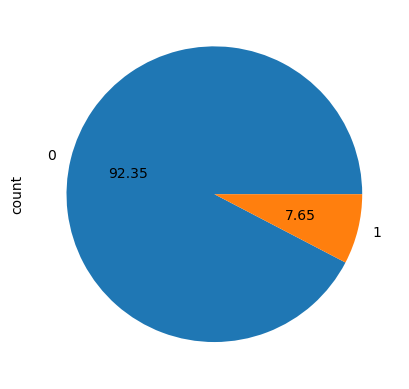

In [849]:
y.value_counts().plot.pie(autopct='%.2f');

In [850]:
(y.value_counts()/y.shape[0])*100

default
0    92.354352
1     7.645648
Name: count, dtype: float64

In [851]:
from imblearn.under_sampling import RandomUnderSampler

In [852]:
rus = RandomUnderSampler(random_state=42)
X_train, y_train = rus.fit_resample(X_train, y_train)

In [853]:
X_train, y_train = rus.fit_resample(X_train, y_train)

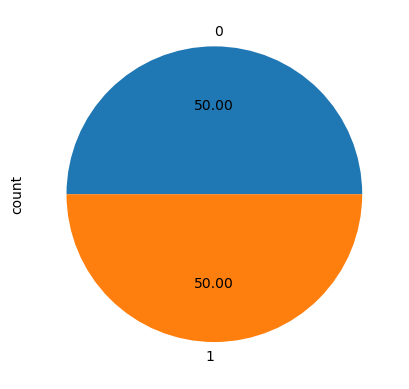

In [854]:
y_train.value_counts().plot.pie(autopct='%.2f');

## Albero bilanciato

In [855]:
clf_df2 = DecisionTreeClassifier(random_state=100)

In [856]:
clf_df2.fit(X_train, y_train)

DecisionTreeClassifier(random_state=100)

In [857]:
# Make predictions on the test set
predictions = clf_df2.predict(X_test)

# Evaluate the accuracy of the predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", (accuracy * 100).round(), "%")

Accuracy: 99.0 %


In [858]:
confusion_matrix(y_test,predictions)

array([[1929,   22],
       [   7,  169]], dtype=int64)

In [859]:
recall_score(y_test,predictions)

0.9602272727272727

In [860]:
print(X_train.shape)
print(y_train.shape)

(732, 96)
(732,)


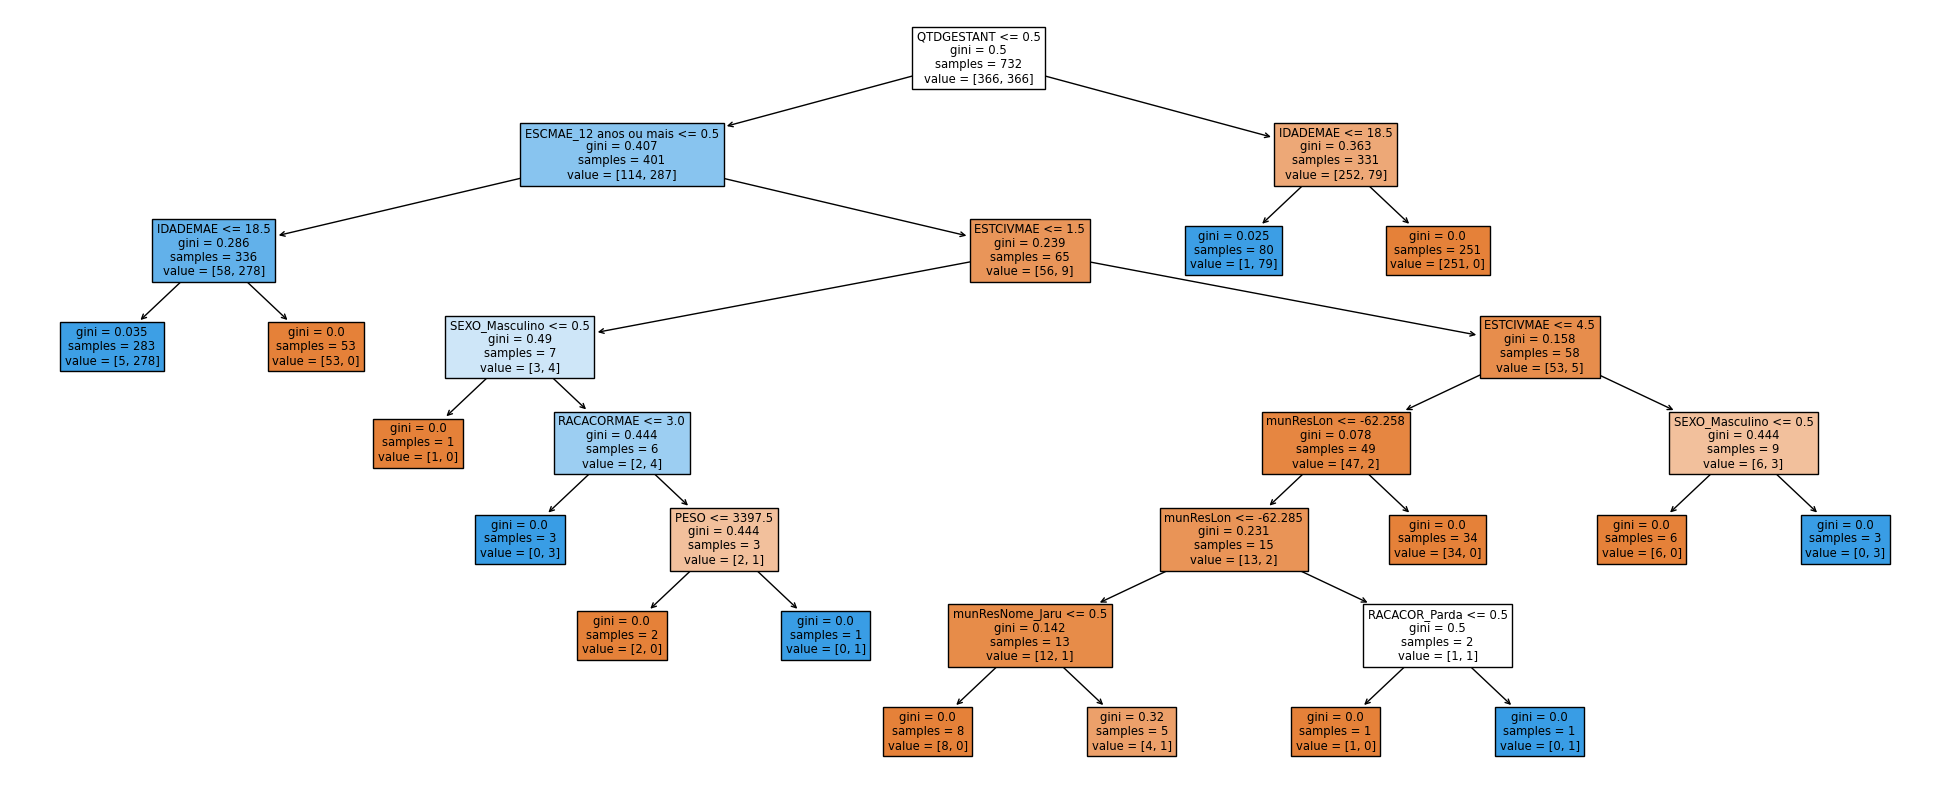

In [861]:
clf_df3 = DecisionTreeClassifier(max_depth=8, max_leaf_nodes=15, max_features=25, random_state=100)
clf_df3.fit(X_train, y_train)

plt.figure(figsize=(25, 10))
plot_tree(clf_df3,
          filled=True,
          feature_names=X_train.columns);

In [862]:
predictions = clf_df3.predict(X_test)

In [863]:
# Calcola il numero totale di 0 e 1 all'interno dell'array
count_0 = np.count_nonzero(predictions == 0)
count_1 = np.count_nonzero(predictions == 1)

# Calcola la proporzione di 0 e 1 rispetto alla lunghezza totale dell'array
proportion_0 = count_0 / len(predictions)
proportion_1 = count_1 / len(predictions)

# Stampa i risultati
print("Proporzione di 0:", proportion_0)
print("Proporzione di 1:", proportion_1)

Proporzione di 0: 0.8805829807240244
Proporzione di 1: 0.11941701927597555


In [864]:
prestazioni(clf_df3, X_test, y_test)

Accuracy: 96.0 %

Confusion Matrix:
[[1871   80]
 [   2  174]]

Recall Score: 99.0 %

Precision Score Value 69.0 %


## Post pruning

In [865]:
clf = DecisionTreeClassifier(random_state=100)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [866]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

In [867]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_score = [clf.score(X_test, y_test) for clf in clfs]

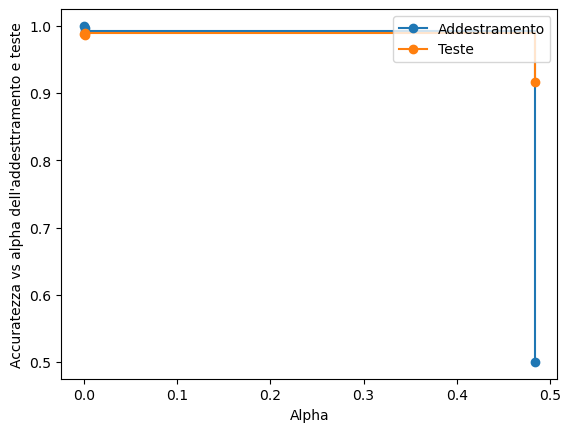

In [868]:
fig, ax = plt.subplots()
ax.set_xlabel('Alpha')
ax.set_ylabel("Accuratezza vs alpha dell'addesttramento e teste")
ax.plot(ccp_alphas, train_scores, marker='o', label='Addestramento',
        drawstyle='steps-post')
ax.plot(ccp_alphas, test_score, marker='o', label='Teste',
        drawstyle='steps-post')
ax.legend()
plt.show()

In [869]:
ALPHA = pd.DataFrame({'Alphas':ccp_alphas.tolist(), 'Score': test_score})
ALPHA['Score'].max()

0.9891866478608369

In [870]:
ALPHA[ALPHA['Score'] == 0.9943582510578279]

,Alphas,Score


## L'albero migliore

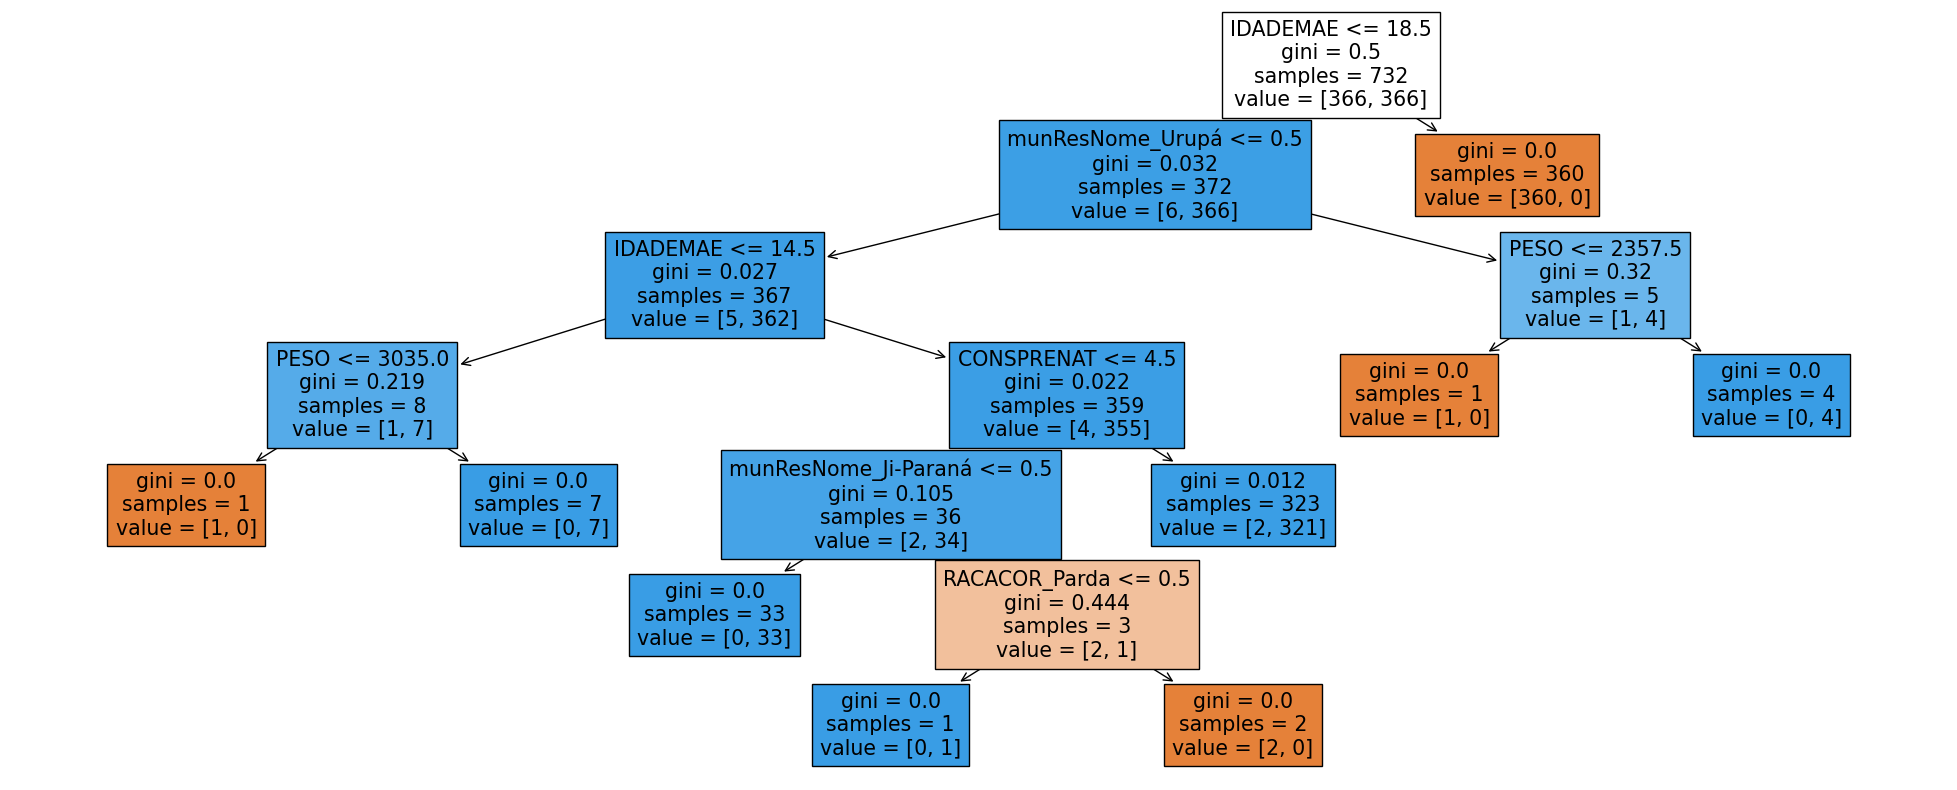

In [871]:
clf_df4 = DecisionTreeClassifier(ccp_alpha=0.001359, random_state=100)
clf_df4.fit(X_train, y_train)

plt.figure(figsize=(25, 10))
plot_tree(clf_df4,
          filled=True,
          feature_names=X_train.columns);

In [872]:
predictions = clf_df4.predict(X_test)

In [873]:
# Calcola il numero totale di 0 e 1 all'interno dell'array
count_0 = np.count_nonzero(predictions == 0)
count_1 = np.count_nonzero(predictions == 1)

# Calcola la proporzione di 0 e 1 rispetto alla lunghezza totale dell'array
proportion_0 = count_0 / len(predictions)
proportion_1 = count_1 / len(predictions)

# Stampa i risultati
print("Proporzione di 0:", proportion_0)
print("Proporzione di 1:", proportion_1)

Proporzione di 0: 0.9097320169252469
Proporzione di 1: 0.09026798307475317


In [874]:
prestazioni(clf_df4, X_test, y_test)

Accuracy: 99.0 %

Confusion Matrix:
[[1929   22]
 [   6  170]]

Recall Score: 97.0 %

Precision Score Value 89.0 %


In [875]:
clf_df4.get_params()

{'ccp_alpha': 0.001359,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 100,
 'splitter': 'best'}

In [876]:
from sklearn.metrics import precision_score
precision_score(y_test, predictions)

0.8854166666666666

In [877]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1951
           1       0.89      0.97      0.92       176

    accuracy                           0.99      2127
   macro avg       0.94      0.98      0.96      2127
weighted avg       0.99      0.99      0.99      2127



In [878]:
feature_names = X.columns

feature_importance = pd.DataFrame(clf_df4.feature_importances_, index = feature_names).sort_values(0, ascending=False)
feature_importance.head(5)

,0
IDADEMAE,0.978929
PESO,0.009254
munResNome_Ji-Paraná,0.006752
RACACOR_Parda,0.003683
munResNome_Urupá,0.000947


<Axes: >

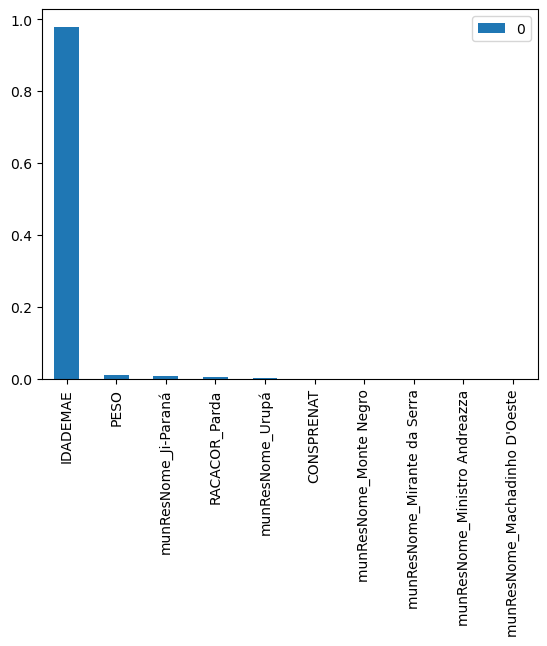

In [879]:
features = list(feature_importance[feature_importance[0]>0].index)
feature_importance.head(10).plot(kind='bar')

### Pulire

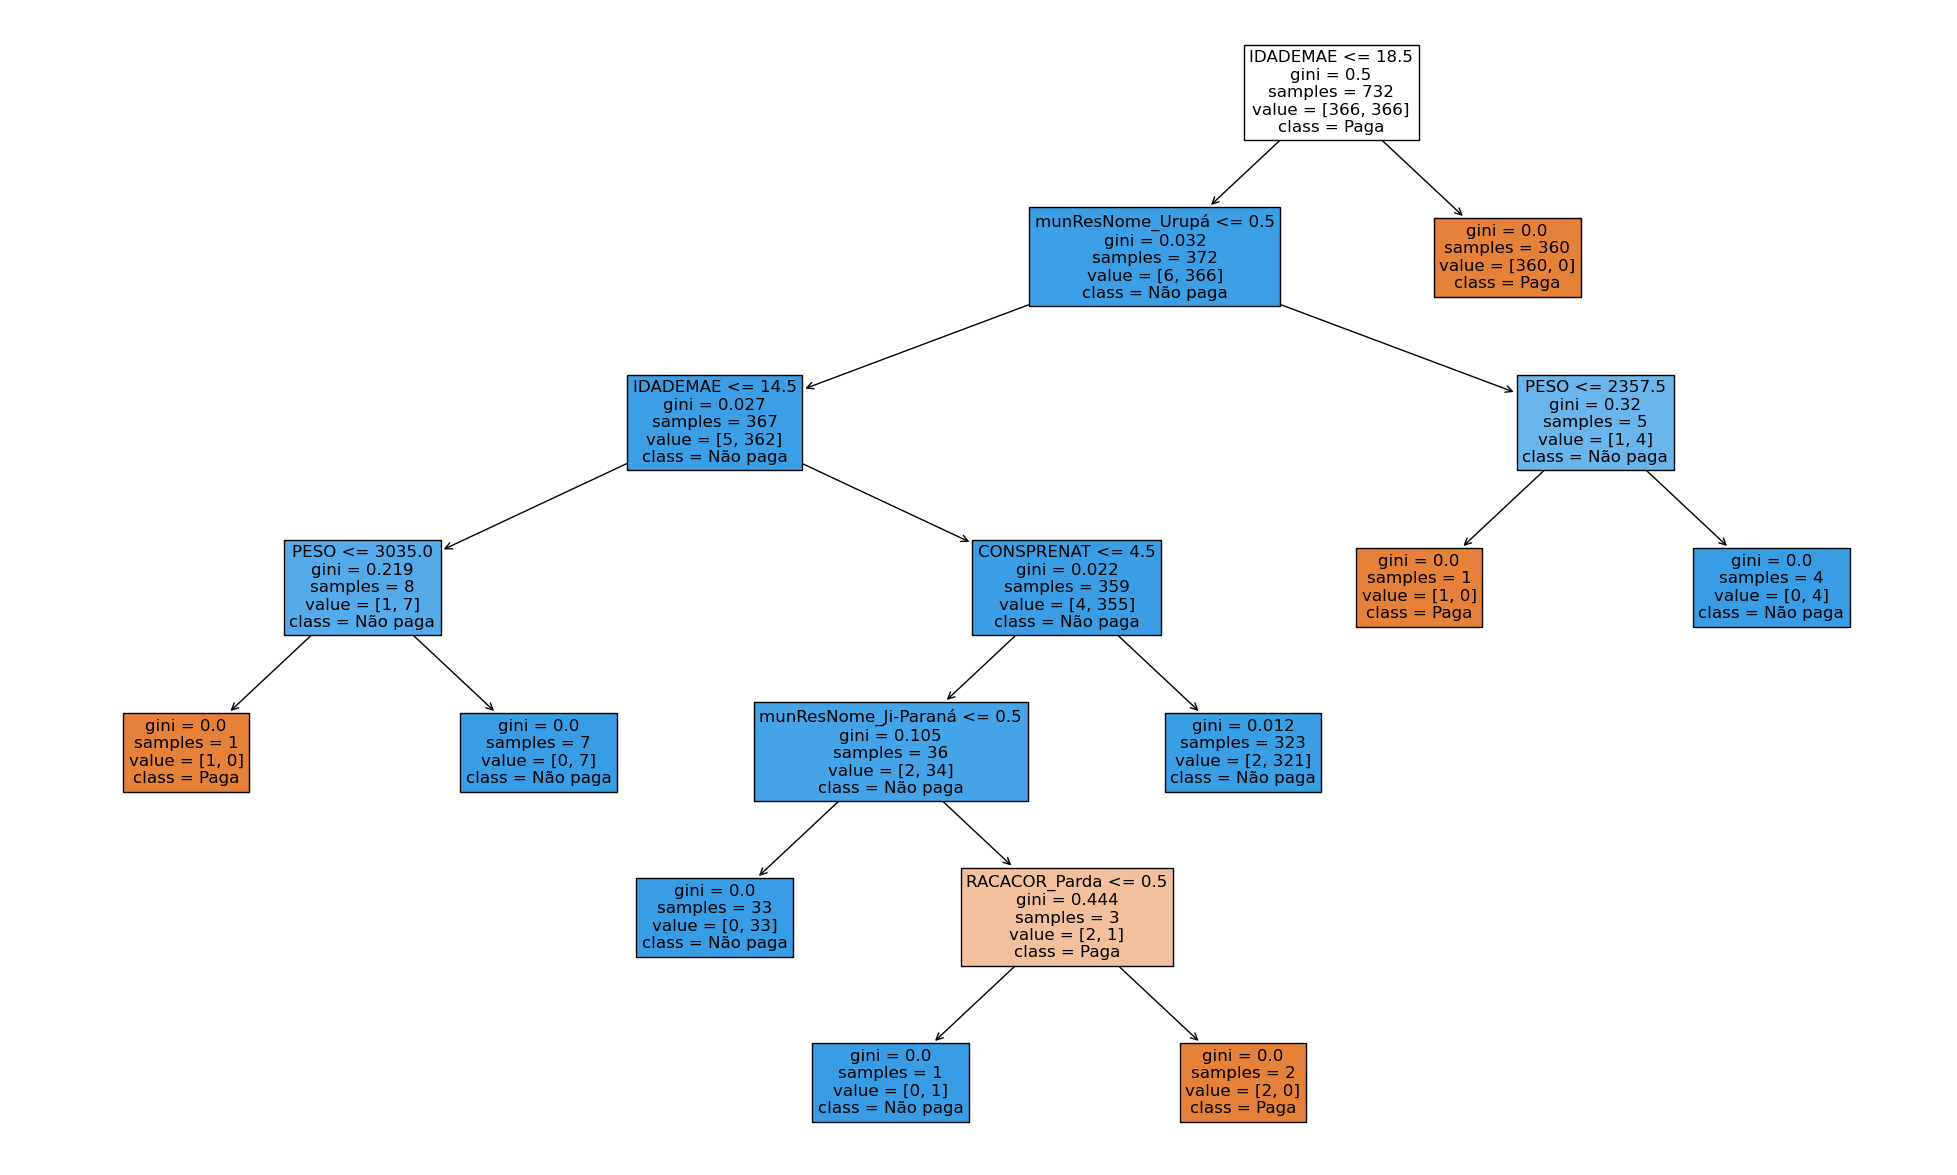

In [880]:
from sklearn import tree

fig = plt.figure(figsize=(25,15))
_ = tree.plot_tree(clf_df4, 
                   feature_names=feature_names,  
                   class_names={0:'Paga', 1:'Não paga'},
                   filled=True,
                  fontsize=12)

#